In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('C:/Users/micronet computers/Desktop/Projects/Machine Learning/cardio_train.csv', sep=';')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [8]:
df.shape

(70000, 13)

In [9]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

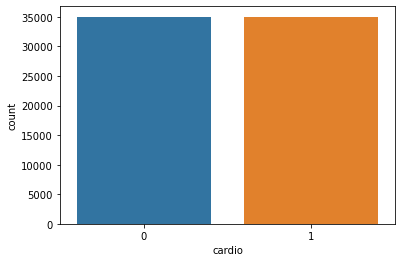

In [11]:
sns.countplot(df.cardio)

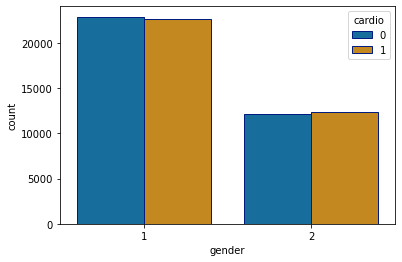

In [12]:
sns.countplot(x='gender', hue='cardio',data=df, palette='colorblind', edgecolor = sns.color_palette('dark',n_colors=1))

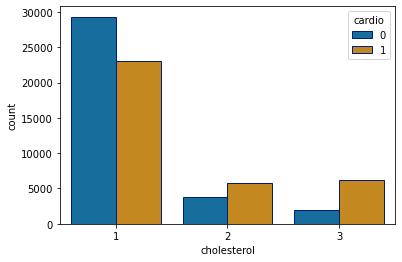

In [13]:
sns.countplot(x='cholesterol', hue='cardio',data=df, palette='colorblind', edgecolor = sns.color_palette('dark',n_colors=1))

In [14]:
df.age = df.age//365

In [15]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


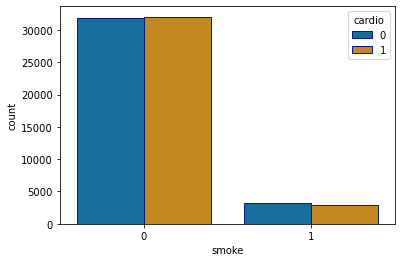

In [16]:
sns.countplot(x='smoke', hue='cardio',data=df, palette='colorblind', edgecolor = sns.color_palette('dark',n_colors=1))

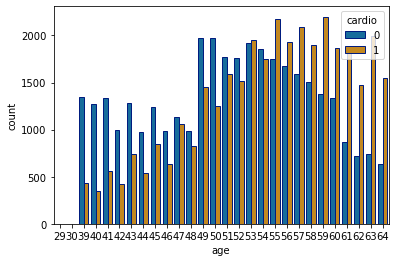

In [17]:
sns.countplot(x='age', hue='cardio',data=df, palette='colorblind', edgecolor = sns.color_palette('dark',n_colors=1))

In [18]:
X = df.iloc[:, 1:12]
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [19]:
y = df.cardio
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

### This is additional - Feature Selection

In [20]:
from sklearn.feature_selection import SelectKBest

In [21]:
from sklearn.feature_selection import f_classif

In [22]:
features = SelectKBest(score_func=f_classif)

In [23]:
features.fit(X,y)

SelectKBest()

In [38]:
features

SelectKBest()

In [31]:
score = pd.DataFrame(features.scores_, columns=['Feature Score Value'])
score

,Feature Score Value
0,4202.465728
1,4.603641
2,8.197397
3,2388.777887
4,208.339524
5,303.629011
6,3599.361137
7,562.772977
8,16.790541
9,3.761355


In [36]:
feature_score = pd.concat([pd.DataFrame(X.columns, columns=['Feature Name']), score], axis=1)
feature_score

,Feature Name,Feature Score Value
0,age,4202.465728
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [37]:
feature_score.nlargest(7,'Feature Score Value')

,Feature Name,Feature Score Value
0,age,4202.465728
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494


### Feature Importance

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
model = ExtraTreesClassifier()

In [41]:
model.fit(X,y)

ExtraTreesClassifier()

In [43]:
model.feature_importances_

array([0.13976209, 0.00655367, 0.2259149 , 0.23427854, 0.19921048,
       0.11897085, 0.04786234, 0.01260389, 0.00471928, 0.00475097,
       0.00537298])

In [45]:
top = pd.Series(model.feature_importances_, index=X.columns)
top

age            0.139762
gender         0.006554
height         0.225915
weight         0.234279
ap_hi          0.199210
ap_lo          0.118971
cholesterol    0.047862
gluc           0.012604
smoke          0.004719
alco           0.004751
active         0.005373
dtype: float64

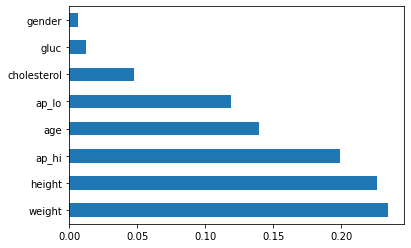

In [54]:
top.nlargest(8).plot(kind='barh')

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfl = RandomForestClassifier()
val_score = cross_val_score(rfl, X, y, cv=20, scoring='accuracy')
val_score.mean()

0.7079285714285715

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=4)

In [41]:
rfl2 = RandomForestClassifier()
rfl2.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
rfl2.score(X_test, y_test)

0.7066857142857143